# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину. 

## Шаги для выбора локации:

1. В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов.
2. Строят модель для предсказания объёма запасов в новых скважинах.
3. Выбирают скважины с самыми высокими оценками значений.
4. Определяют регион с максимальной суммарной прибылью отобранных скважин.

Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

## Инструкция по выполнению проекта:

### 1. Загрузите и подготовьте данные. Поясните порядок действий.

### 2. Обучите и проверьте модель для каждого региона:
   2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.  
   2.2. Обучите модель и сделайте предсказания на валидационной выборке.  
   2.3. Сохраните предсказания и правильные ответы на валидационной выборке.  
   2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.  
   2.5. Проанализируйте результаты.

### 3. Подготовьтесь к расчёту прибыли:
   3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.  
   3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.  
   3.3. Напишите выводы по этапу подготовки расчёта прибыли.

### 4. Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
   4.1. Выберите скважины с максимальными значениями предсказаний.  
   4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.  
   4.3. Рассчитайте прибыль для полученного объёма сырья.

### 5. Посчитайте риски и прибыль для каждого региона:
   5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.  
   5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.  
   5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

### Условия задачи:

- Для обучения модели подходит только **линейная регрессия** (остальные модели — недостаточно предсказуемые).
- При разведке региона исследуют **500 точек**, из которых с помощью машинного обучения выбирают **200 лучших** для разработки.
- Бюджет на разработку скважин в регионе — **10 млрд рублей**.
- При нынешних ценах один баррель сырья приносит **450 рублей дохода**. Доход с каждой единицы продукта составляет **450 тыс. рублей**, поскольку объём указан в **тысячах баррелей**.
- После оценки рисков нужно оставить лишь те регионы, в которых **вероятность убытков меньше 2.5%**. Среди них выбирают регион с **наибольшей средней прибылью**.


### Импорт библиотек

In [53]:
!pip install --upgrade scikit-learn --quiet

In [54]:
import pandas as pd
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [55]:
RANDOM_STATE = 42

### Шаг 1. Загрузка и подготовка данных

In [56]:
try:
    geo_0 = pd.read_csv('datasets/geo_data_0.csv')
    geo_1 = pd.read_csv('datasets/geo_data_1.csv')
    geo_2 = pd.read_csv('datasets/geo_data_2.csv')
except FileNotFoundError:
    geo_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    geo_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    geo_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

In [57]:
display(geo_0.info())
display(geo_0.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [58]:
display(geo_1.info())
display(geo_1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [59]:
display(geo_2.info())
display(geo_2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [60]:
print(f'Пропусков в данных geo_0: {geo_0.isna().sum().sum()}')
print(f'Пропусков в данных geo_1: {geo_1.isna().sum().sum()}')
print(f'Пропусков в данных geo_2: {geo_2.isna().sum().sum()}')
print()
print(f'Дубликатов в данных geo_0: {geo_0.duplicated().sum()}')
print(f'Дубликатов в данных geo_1: {geo_1.duplicated().sum()}')
print(f'Дубликатов в данных geo_2: {geo_2.duplicated().sum()}')

Пропусков в данных geo_0: 0
Пропусков в данных geo_1: 0
Пропусков в данных geo_2: 0

Дубликатов в данных geo_0: 0
Дубликатов в данных geo_1: 0
Дубликатов в данных geo_2: 0


#### Промежуточный вывод <br>
Данные загружены и изучены. Пропусков и дубликатов в данных нет. Все данные числовые.

#### Анализ признаков

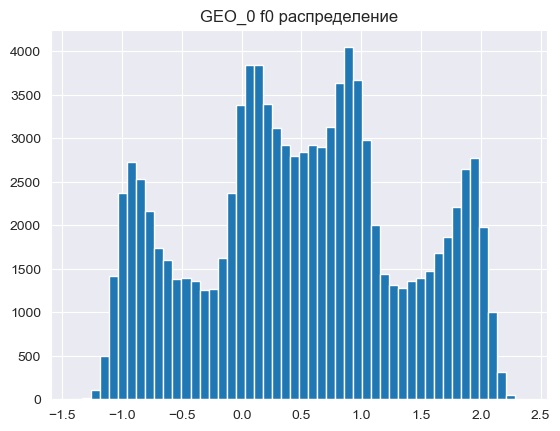

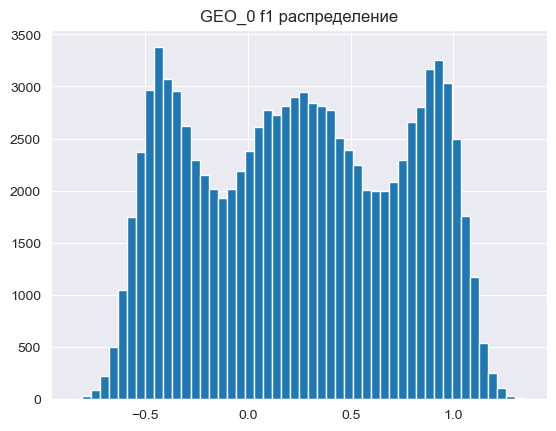

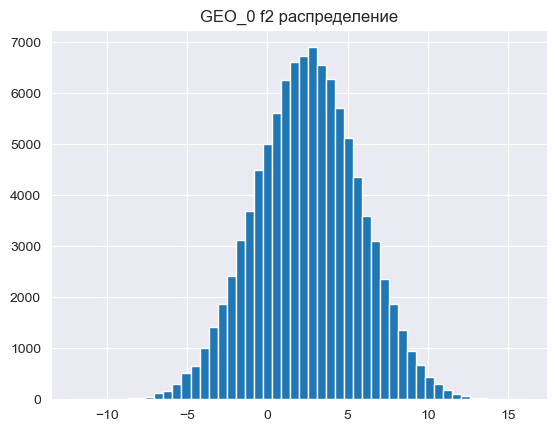

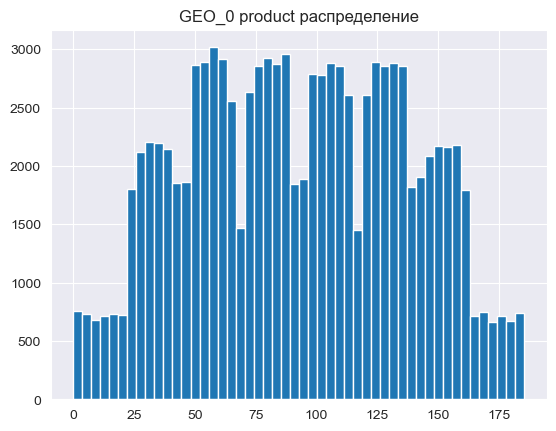

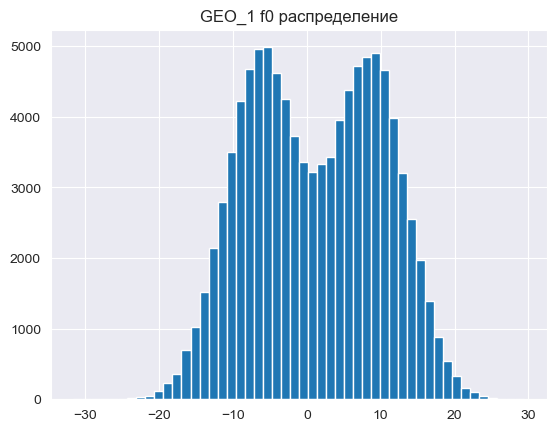

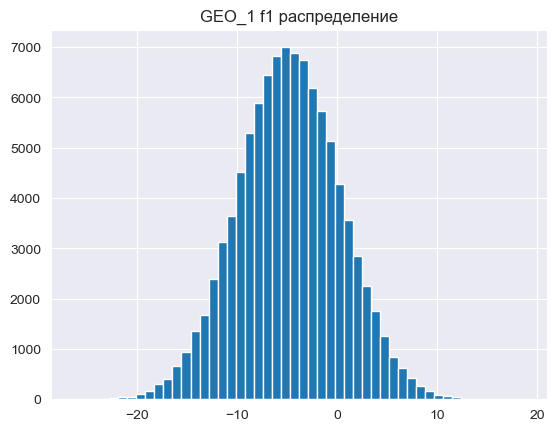

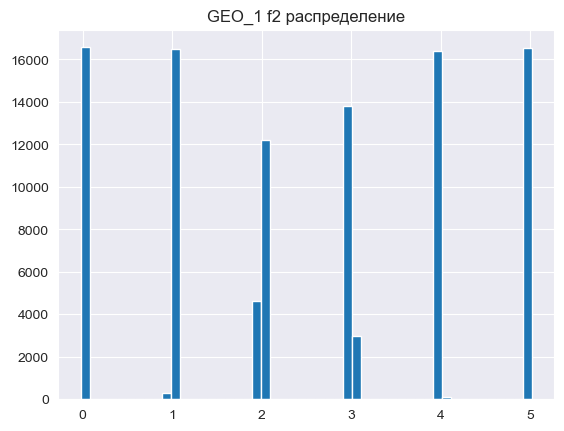

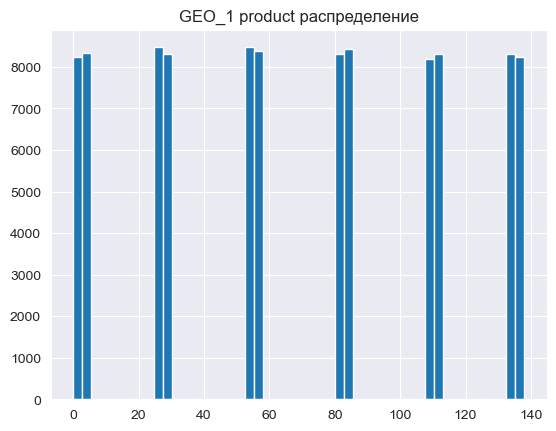

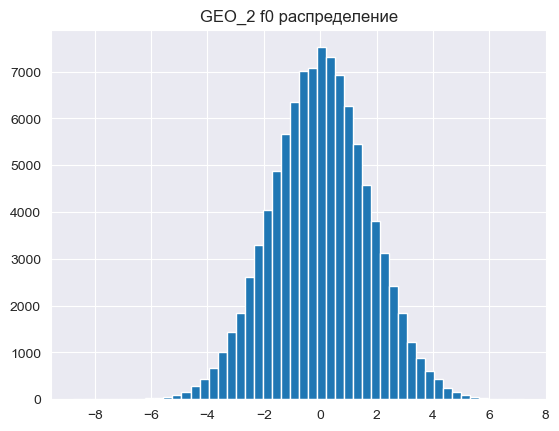

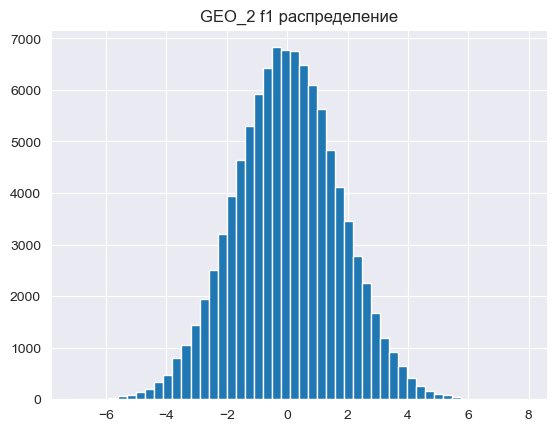

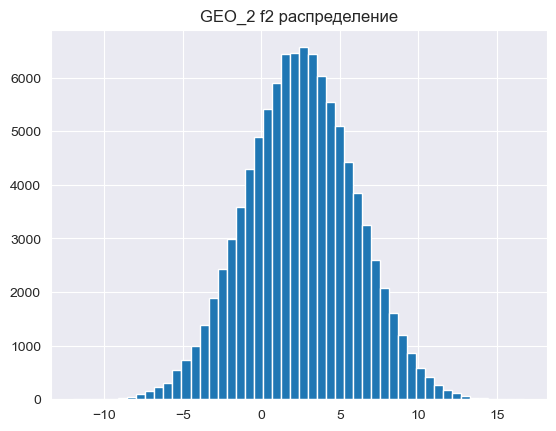

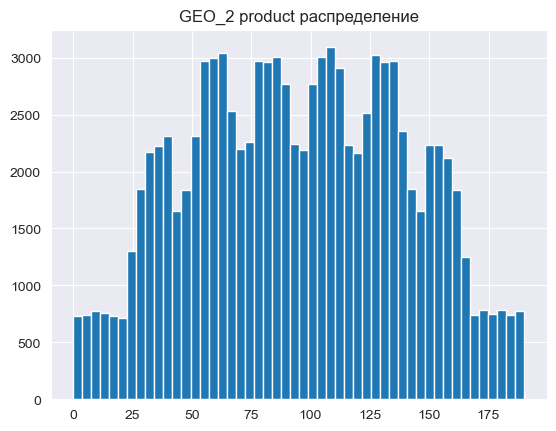

In [61]:
for col in geo_0.columns[1:]:
    geo_0[col].hist(bins=50)
    plt.title(f'GEO_0 {col} распределение')
    plt.show()
    
for col in geo_1.columns[1:]:
    geo_1[col].hist(bins=50)
    plt.title(f'GEO_1 {col} распределение')
    plt.show()

for col in geo_2.columns[1:]:
    geo_2[col].hist(bins=50)
    plt.title(f'GEO_2 {col} распределение')
    plt.show()

Данные имеют не нормальное распределение. Следует использовать стандартизацию данных.

In [62]:
geo_0_corr = geo_0.drop('id', axis=1).corr()
geo_1_corr = geo_1.drop('id', axis=1).corr()
geo_2_corr = geo_2.drop('id', axis=1).corr()

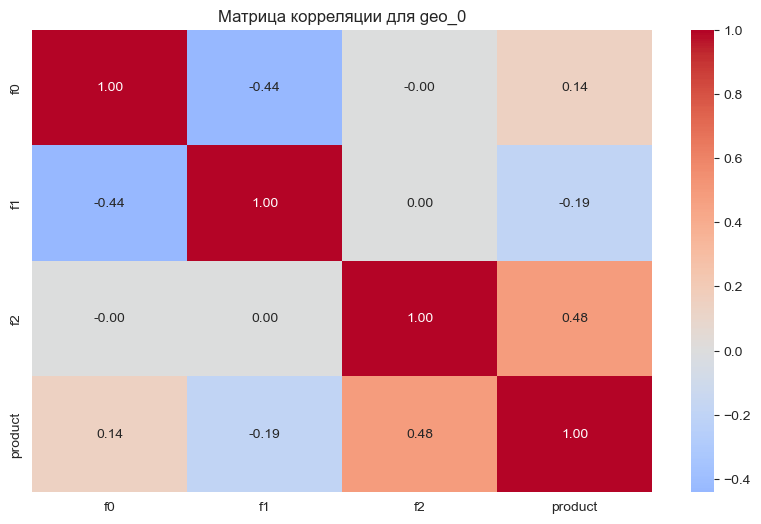

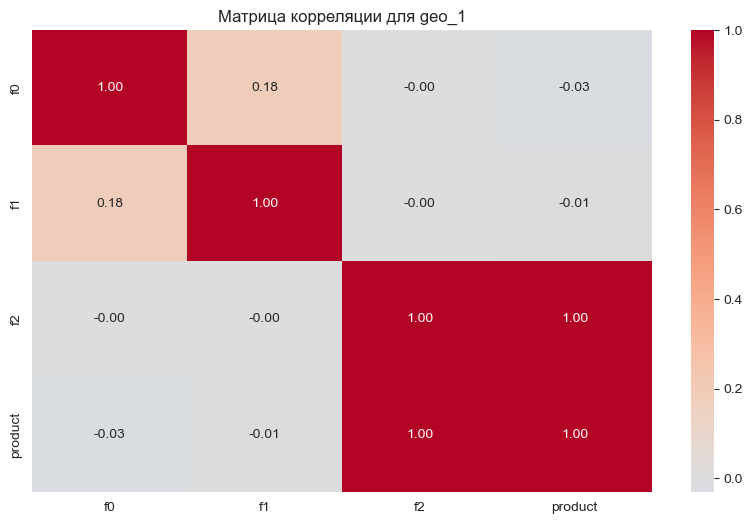

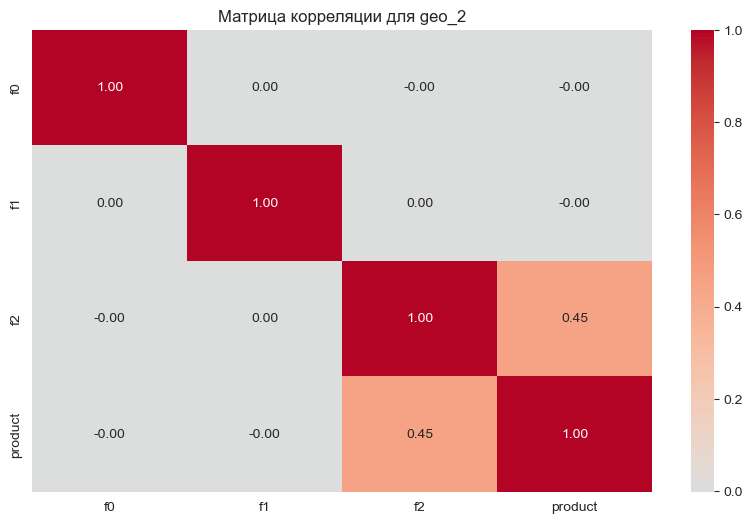

In [63]:
plt.figure(figsize=(10, 6))
sns.heatmap(geo_0_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Матрица корреляции для geo_0')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(geo_1_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Матрица корреляции для geo_1')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(geo_2_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Матрица корреляции для geo_2')
plt.show()

#### Промежуточный вывод <br>
Для geo_1 признак f2 имеет корреляцию 1 с целевым признаком. Следует округлить значения признака f2 и закодировать его с помощью OneHotEncoder.


### Шаг 2. Обучение и проверка модели для каждого региона

#### Модель для GEO_0

In [64]:
X_0 = geo_0.drop(['id', 'product'], axis=1)
y_0 = geo_0['product']

X_train_0, X_valid_0, y_train_0, y_valid_0 = train_test_split(X_0, y_0, test_size=0.25, random_state=RANDOM_STATE)

scaler = StandardScaler()
X_train_0 = scaler.fit_transform(X_train_0)
X_valid_0 = scaler.transform(X_valid_0)

model_0 = LinearRegression()
model_0.fit(X_train_0, y_train_0)

y_pred_0 = model_0.predict(X_valid_0)

predicted_mean_0 = y_pred_0.mean()
rmse_0 = root_mean_squared_error(y_valid_0, y_pred_0)

print(f'Средний запас предсказанного сырья в регионе 0: {predicted_mean_0:.2f}')
print(f'RMSE модели в регионе 0: {rmse_0:.2f}')

Средний запас предсказанного сырья в регионе 0: 92.40
RMSE модели в регионе 0: 37.76


#### Модель для GEO_1

In [65]:
X_1 = geo_1.drop(['id', 'product'], axis=1)
y_1 = geo_1['product']

X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(X_1, y_1, test_size=0.25, random_state=RANDOM_STATE)

scaler = StandardScaler()
X_train_1_scaled = scaler.fit_transform(X_train_1.drop('f2', axis=1))
X_valid_1_scaled = scaler.transform(X_valid_1.drop('f2', axis=1))

X_train_1['f2'] = X_train_1['f2'].round()
X_valid_1['f2'] = X_valid_1['f2'].round()

encoder = OneHotEncoder(sparse_output=False)
X_train_1_f2_encoded = encoder.fit_transform(X_train_1[['f2']])
X_valid_1_f2_encoded = encoder.transform(X_valid_1[['f2']])

X_train_1_final = np.hstack([X_train_1_scaled, X_train_1_f2_encoded])
X_valid_1_final = np.hstack([X_valid_1_scaled, X_valid_1_f2_encoded])

model_1 = LinearRegression()
model_1.fit(X_train_1_final, y_train_1)

y_pred_1 = model_1.predict(X_valid_1_final)

predicted_mean_1 = y_pred_1.mean()
rmse_1 = root_mean_squared_error(y_valid_1, y_pred_1)

print(f'Средний запас предсказанного сырья в регионе 1: {predicted_mean_1:.2f}')
print(f'RMSE модели в регионе 1: {rmse_1:.2f}')

Средний запас предсказанного сырья в регионе 1: 68.71
RMSE модели в регионе 1: 0.88


#### Модель для GEO_2

In [66]:
X_2 = geo_2.drop(['id', 'product'], axis=1)
y_2 = geo_2['product']

X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(X_2, y_2, test_size=0.25, random_state=RANDOM_STATE)

scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_valid_2 = scaler.transform(X_valid_2)

model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)

y_pred_2 = model_2.predict(X_valid_2)

predicted_mean_2 = y_pred_2.mean()
rmse_2 = root_mean_squared_error(y_valid_2, y_pred_2)

print(f'Средний запас предсказанного сырья в регионе 2: {predicted_mean_2:.2f}')
print(f'RMSE модели в регионе 2: {rmse_2:.2f}')

Средний запас предсказанного сырья в регионе 2: 94.77
RMSE модели в регионе 2: 40.15


In [67]:
results = {
    '0': {
        'actual_product': y_valid_0,
        'predicted_product': y_pred_0
    },
    '1': {
        'actual_product': y_valid_1,
        'predicted_product': y_pred_1
    },
    '2': {
        'actual_product': y_valid_2,
        'predicted_product': y_pred_2
    }
}

#### Промежуточный вывод <br>
Средний запас предсказанного сырья в регионе 0 и 2 больше, чем в регионе 1, но RMSE модели в регионе 1 значительно меньше, чем в остальных регионах. <br>
- Если приоритет это точность и низкие риски, то стоит выбрать регион 1 
- Если приоритет это средний запас сырья, но при этом высокие риски, то стоит выбрать регион 0 или 2

### Шаг 3. Подготовка к расчёту прибыли

In [68]:
# Бюджет 10 миллиардов рублей
TOTAL_BUDGET = 10e9
# Доход с каждой единицы сырья (тысяч баррелей) 450 тыс. рублей
INCOME_PER_UNIT = 450e3  
# Количество лучших скважин для разработки
N_BOREHOLES = 200

Достаточный объём сырья для безубыточной разработки новой скважины

In [69]:
sufficient_volume = TOTAL_BUDGET / (INCOME_PER_UNIT * N_BOREHOLES)
print(f'Достаточный объём сырья для безубыточной разработки новой скважины: {sufficient_volume:.2f}')

Достаточный объём сырья для безубыточной разработки новой скважины: 111.11


#### Промежуточный вывод <br>
Достаточный объём сырья для безубыточной разработки новой скважины составляет 111.11 тыс. баррелей. <br>
Средний запас сырья в каждом регионе: <br>
- Регион 0: 92.40 тыс. баррелей
- Регион 1: 68.71 тыс. баррелей
- Регион 2: 94.77 тыс. баррелей <br>
Для достижения безубыточности стоит выбрать регион 0 или 2, так как средний запас сырья в этих регионах больше.

### Шаг 4. Функция для расчёта прибыли

In [70]:
def calculate_profit(actual_product, predicted_product, budget, income_per_unit, n_boreholes):
    sorted_indices = predicted_product.sort_values(ascending=False).index
    selected_boreholes = actual_product.loc[sorted_indices][:n_boreholes]
    
    revenue = selected_boreholes.sum() * income_per_unit
    profit = revenue - budget
    
    return profit

### Шаг 5. Расчёт прибыли и рисков

In [71]:
def bootstrap_profit (actual_product, predicted_product, n_boreholes, income_per_unit, budget, n_samples=1000):
    state = np.random.RandomState(RANDOM_STATE)
    profits = []

    # По умолчанию берём 1000 выборок
    for i in range(n_samples):
        indices = state.choice(actual_product.index, size=500, replace=True)
        target_subsample = actual_product[indices]
        predicted_subsample = predicted_product[indices]
        
        profits.append(calculate_profit(target_subsample, predicted_subsample, budget, income_per_unit, n_boreholes))
    
    profits = pd.Series(profits)

    mean_profit = profits.mean() / 1e9
    lower = profits.quantile(0.025) / 1e9
    upper = profits.quantile(0.975) / 1e9
    loss_risk = (profits < 0).mean()
    
    print(f'Средняя прибыль: {mean_profit:.2f} млрд рублей')
    print(f'95%-й доверительный интервал: от {lower:.2f} до {upper:.2f} млрд рублей')
    print(f'Риск убытков: {loss_risk:.2%}')

In [72]:
for i, region in enumerate(results.values()):
    print(f'Регион {i}')
    actual_product = pd.Series(region['actual_product']).reset_index(drop=True)
    predicted_product = pd.Series(region['predicted_product']).reset_index(drop=True)
    bootstrap_profit(actual_product, predicted_product, N_BOREHOLES, INCOME_PER_UNIT, TOTAL_BUDGET)

Регион 0
Средняя прибыль: 0.43 млрд рублей
95%-й доверительный интервал: от -0.10 до 0.95 млрд рублей
Риск убытков: 5.50%
Регион 1
Средняя прибыль: 0.51 млрд рублей
95%-й доверительный интервал: от 0.10 до 0.94 млрд рублей
Риск убытков: 0.90%
Регион 2
Средняя прибыль: 0.40 млрд рублей
95%-й доверительный интервал: от -0.14 до 0.93 млрд рублей
Риск убытков: 7.40%


#### Промежуточный вывод <br>
- Риск убытков менее 2.5% только в регионе 1

### Вывод <br>
В ходе исследования были выполнены следующие шаги:
1. Загружены и изучены данные
2. Обучена и проверена модель для каждого региона
3. Подготовлены данные для расчёта прибыли
4. Написана функция для расчёта прибыли
5. Рассчитана прибыль и риски для каждого региона <br>


#### На основе проведенного анализа можно сделать следующие выводы:
- Наибольшая средняя прибыль у региона 1
- Риск убытков менее 2.5% только в регионе 1
- Средний запас сырья в регионе 0 и 2 больше, чем в регионе 1
- RMSE модели в регионе 1 меньше, чем в остальных регионах <br>

#### Рекомендация <br>
Стоит выбрать регион 1 для разработки скважин, так как в нем наибольшая средняя прибыль и наименьший риск убытков.